<a href="https://www.kaggle.com/code/pirajeshmr/ml-main-recommendation?scriptVersionId=214505152" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns
from tkinter import *
from tkinter import messagebox
import sys 
import urllib
import urllib.request

In [33]:
df = pd.read_csv('/kaggle/input/sympdp/dataset.csv')
severity = pd.read_csv('/kaggle/input/sympdp/Symptom-severity.csv')
description = pd.read_csv('/kaggle/input/sympdp/symptom_Description.csv')
precaution = pd.read_csv('/kaggle/input/sympdp/symptom_precaution.csv')

In [34]:
combined_df = pd.merge(df,description,on='Disease')
combined_df.shape

(4560, 19)

In [35]:
combined_df = pd.merge(combined_df,precaution,on='Disease')

In [36]:
del combined_df['Symptom_4']
del combined_df['Symptom_5']   
del combined_df['Symptom_6']   
del combined_df['Symptom_7']   
del combined_df['Symptom_8']   
del combined_df['Symptom_9']   
del combined_df['Symptom_10']   
del combined_df['Symptom_11']   
del combined_df['Symptom_12']   
del combined_df['Symptom_13']   
del combined_df['Symptom_14']   
del combined_df['Symptom_15']   
del combined_df['Symptom_16']
del combined_df['Symptom_17']    

In [37]:
combined_df = combined_df.fillna(method='ffill') 

In [38]:
cols = combined_df.columns
data = combined_df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(combined_df.shape)

combined_df = pd.DataFrame(s, columns=combined_df.columns)
combined_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
3,Fungal infection,itching,skin_rash,dischromic _patches,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths


In [39]:
X = combined_df[['Symptom_1','Symptom_2','Symptom_3']]
X.head()

,Symptom_1,Symptom_2,Symptom_3
0,itching,skin_rash,nodal_skin_eruptions
1,skin_rash,nodal_skin_eruptions,dischromic _patches
2,itching,nodal_skin_eruptions,dischromic _patches
3,itching,skin_rash,dischromic _patches
4,itching,skin_rash,nodal_skin_eruptions


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for lul in X.columns:
    X[lul] = le.fit_transform(X[lul].astype(str))

In [41]:
def get_recommendations(input_symptoms, disease_symptom_matrix, description_df, combined_df, top_n=5):
    input_vector = pd.Series(0, index=disease_symptom_matrix.columns)
    for symptom in input_symptoms:
        if symptom in input_vector.index:
            input_vector[symptom] = 1

    similarities = {}
    for disease in disease_symptom_matrix.index:
        disease_vector = disease_symptom_matrix.loc[disease]
        similarity = cosine_similarity(input_vector.values.reshape(1, -1),
                                    disease_vector.values.reshape(1, -1))[0][0]
        similarities[disease] = similarity

    recommendations = sorted(similarities.items(), 
                           key=lambda x: x[1], 
                           reverse=True)[:top_n]

    result = []
    for disease, score in recommendations:
        disease_info = combined_df[combined_df['Disease'] == disease].iloc[0]
        result.append({
            'Disease': disease,
            'Similarity': score,
            'Description': disease_info['Description'],
            'Precautions': [
                disease_info['Precaution_1'],
                disease_info['Precaution_2'],
                disease_info['Precaution_3'],
                disease_info['Precaution_4']
            ]
        })
    
    return pd.DataFrame(result)



In [42]:
test_symptoms = ['itching', 'skin_rash', 'nodal_skin_eruptions']
recommendations = get_recommendations(test_symptoms, 
                                   disease_symptom_matrix, 
                                   description,
                                   combined_df)

for _, row in recommendations.iterrows():
    print(f"\nDisease: {row['Disease']}")
    print(f"Similarity Score: {row['Similarity']:.3f}")
    print(f"Description: {row['Description']}")
    print("Precautions:")
    for i, precaution in enumerate(row['Precautions'], 1):
        print(f"{i}. {precaution}")
    print("-" * 80)


Disease: Fungal infection
Similarity Score: 0.866
Description: In humans, fungal infections occur when an invading fungus takes over an area of the body and is too much for the immune system to handle. Fungi can live in the air, soil, water, and plants. There are also some fungi that live naturally in the human body. Like many microbes, there are helpful fungi and harmful fungi.
Precautions:
1. bath twice
2. use detol or neem in bathing water
3. keep infected area dry
4. use clean cloths
--------------------------------------------------------------------------------

Disease: Drug Reaction
Similarity Score: 0.577
Description: An adverse drug reaction (ADR) is an injury caused by taking medication. ADRs may occur following a single dose or prolonged administration of a drug or result from the combination of two or more drugs.
Precautions:
1. stop irritation
2. consult nearest hospital
3. stop taking drug
4. follow up
--------------------------------------------------------------------

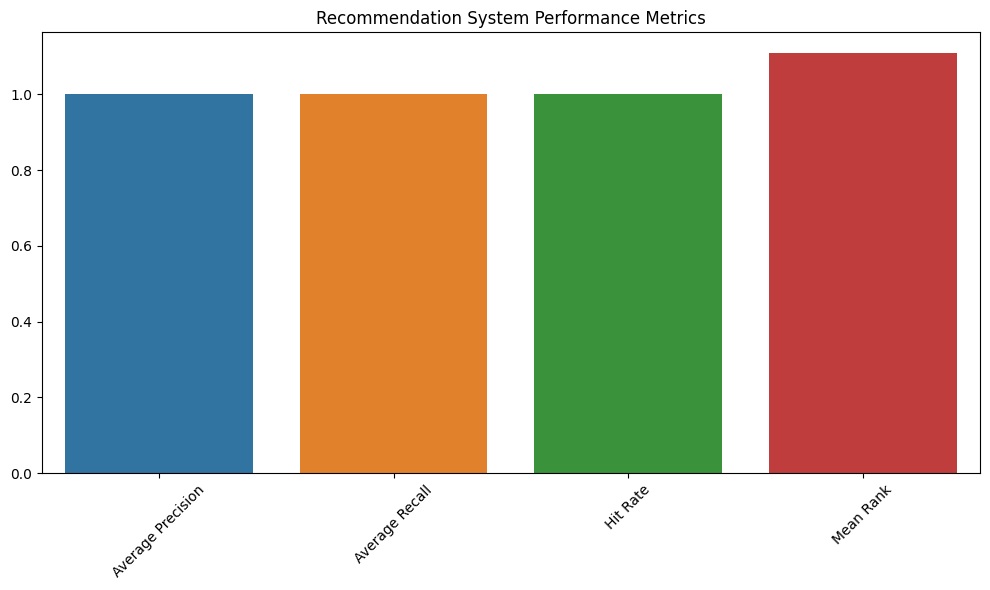


Detailed Metrics:
Average Precision: 1.000
Average Recall: 1.000
Hit Rate: 1.000
Mean Rank: 1.109


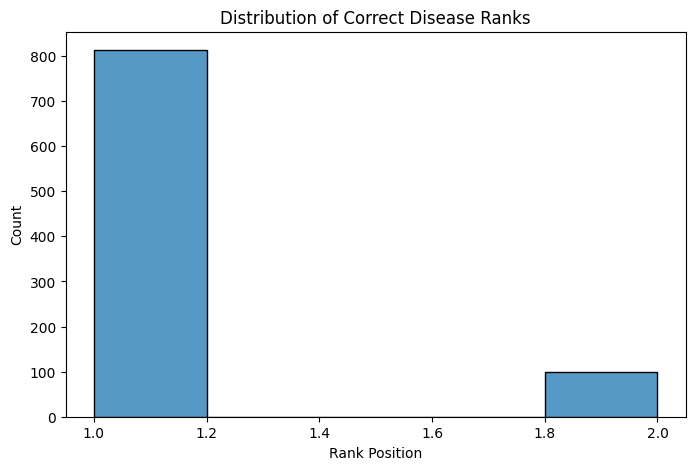

In [45]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df, test_df = train_test_split(combined_df, test_size=0.2, random_state=42)

train_disease_matrix = create_symptom_matrix(train_df)

def evaluate_model():
    results = []
    
    for idx, row in test_df.iterrows():
        actual_symptoms = [row['Symptom_1'], row['Symptom_2'], row['Symptom_3']]
        actual_disease = row['Disease']
        recommendations = get_recommendations(
            actual_symptoms,
            train_disease_matrix,
            description,
            train_df,
            top_n=5
        )
        
        pred_diseases = recommendations['Disease'].values
        metrics = {
            'precision': 1.0 if actual_disease in pred_diseases else 0.0,
            'recall': 1.0 if actual_disease in pred_diseases else 0.0,
            'rank': list(pred_diseases).index(actual_disease) + 1 if actual_disease in pred_diseases else 0,
            'hit': 1.0 if actual_disease in pred_diseases else 0.0
        }
        
        results.append(metrics)
    
    return pd.DataFrame(results)

eval_results = evaluate_model()

avg_metrics = {
    'Average Precision': eval_results['precision'].mean(),
    'Average Recall': eval_results['recall'].mean(),
    'Hit Rate': eval_results['hit'].mean(),
    'Mean Rank': eval_results[eval_results['rank'] > 0]['rank'].mean()
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(avg_metrics.keys()), y=list(avg_metrics.values()))
plt.title('Recommendation System Performance Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nDetailed Metrics:")
for metric, value in avg_metrics.items():
    print(f"{metric}: {value:.3f}")

plt.figure(figsize=(8, 5))
sns.histplot(data=eval_results[eval_results['rank'] > 0], x='rank', bins=5)
plt.title('Distribution of Correct Disease Ranks')
plt.xlabel('Rank Position')
plt.ylabel('Count')
plt.show()